## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad**

Hola, ya es el último proyecto, has avanzado y aprendido mucho hasta acá. ¡Muchas felicidades!

Es hora de poner en práctica todo lo que hemos aprendido a lo largo de nuestra travesía.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que lo concluyas de manera sobresaliente.

¡Éxito!

# Objetivos
- Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
- Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de *Machine Learning*.
- Generar una API que brinde predicciones como resultado a partir de datos enviados.


# Proyecto

1. Selecciona uno de los siguientes *datasets*:
  - Imágenes de rayos X de pecho para detectar neumonía: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
  - *Reviews* de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps
  - Estadísticas demográficas de los ganadores del premio Oscar de la Academia: https://www.kaggle.com/datasets/fmejia21/demographics-of-academy-awards-oscars-winners
  - Aspiraciones profesionales de la generación Z: https://www.kaggle.com/datasets/kulturehire/understanding-career-aspirations-of-genz

Cada uno representa un *dataset*, un problema y una forma diferente de abordarlo. Tu tarea es identificar las técnicas y modelos que podrías usar para tu proyecto.

2. Debes hacer un análisis exploratorio y limpieza de los datos. Usa las ténicas que creas convenientes.

3. Entrena el modelo de *Machine Learning*, procesamiento de lenguaje natural o red neuronal que creas adecuado.

4. Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti.

  - Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (*ensemblings*) y de ajuste de hiperparámetros o *tuning* para intentar mejorar la precisión y disminuir la varianza de tu modelo.

5. Construye una API REST en la que cualquier usuario pueda mandar datos y que esta misma devuelva la predicción del modelo que has hecho. La API debe estar en la nube, ya sea en un servicio como Netlify o Ngrok, para que pueda ser consultada desde internet.

6. Genera una presentación del problema y del modelo de solución que planteas. Muestra gráficas, datos de rendimiento y explicaciones. Esta presentación debe estar enfocada a personas que no sepan mucho de ciencia de datos e inteligencia artificial.

7. **Solamente se recibirán trabajos subidos a tu cuenta de GitHub con un README.md apropiado que explique tu proyecto**.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones | Punto parcial
| -- | -- | -- | -- |
| Actividad 1. Limpieza y EDA | 20 | Realiza todas las tareas necesarias para hacer el EDA y la limpieza correcta, dependiendo de la problemática. Debes hacer como mínimo el análisis de completitud, escalamiento (si aplica) y tokenización (si aplica). | Realizaste solo algunas tareas de exploración y limpieza y el modelo se muestra aún con oportunidad de completitud, escalamiento y/o mejora. |
| Actividad 2. Entrenamiento del modelo | 20 | Elige el modelo y algoritmo adecuados para tu problema, entrénalo con los datos ya limpios y genera algunas predicciones de prueba. | No has realizado predicciones de prueba para tu modelo de ML y/o tu modelo muestra una precisión menor al 60 %. |
| Actividad 3. Graficación y métricas | 20 | Genera por lo menos dos gráficas y dos muestras de métricas que permitan visualizar el rendimiento y precisión del modelo que construiste. Además, realizaste los procesos de *tuning* y ensambles adecuados para tu problema. | Las gráficas no tienen leyendas y colores customizados, solo muestras una gráfica o no realizaste el *tuning* de hiperparámetros.
| Actividad 4. API REST | 20 | Generaste con éxito un *link* público en el que, por método POST, se puede mandar información y la API REST devuelve una predicción junto con el porcentaje de confianza de esta misma. | N/A
| Actividad 5. Presentación | 20 | Genera una presentación en la que establezcas como mínimo: el problema, proceso de solución, metodologías usadas, gráficas de rendimiento, demostración del modelo y aprendizajes obtenidos. Debes redactarla con términos que pueda entender cualquier persona, no solo científicos de datos. | La presentación no expone con claridad o en términos coloquiales el proceso de creación del modelo, sus ventajas y muestras de rendimiento.

**Mucho éxito en tu camino como Data Scientist.**

In [1]:
import sys
sys.executable


'/Users/ssullengirl/Documents/VScode/Bootcamp/Proyecto 7/venv/bin/python'

In [1]:
import tensorflow as tf
tf.keras.applications.DenseNet121(weights="imagenet")


2026-02-04 21:08:52.557698: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


33188688/33188688 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


<Functional name=densenet121, built=True>

In [51]:
# Librerías estándar
import os
import random

# Visualización
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import cv2

# Machine learning
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score
)
from sklearn.metrics import accuracy_score
# Tensorflow / Keras
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import (
    GlobalAveragePooling2D,
    Dense,
    Dropout
)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (
    EarlyStopping,
    ReduceLROnPlateau
)
from tensorflow.keras.applications import MobileNetV2

In [ ]:
# Reproductibilidad
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# Visualización
plt.style.use("seaborn-v0_8")
sns.set_theme(style="darkgrid")

# Verificar TensorFlow 
tf.keras.backend.clear_session()
print("TensorFlow version:", tf.__version__)
print("Devices:", tf.config.list_physical_devices())

TensorFlow version: 2.16.2
Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


## EDA

In [ ]:
from pathlib import Path

# Directorio raíz Proyecto 7
BASE_DIR = Path.cwd()

print("Base dir:", BASE_DIR)

# Dataset
DATA_DIR = BASE_DIR / "chest_xray"

train_dir = DATA_DIR / "train"
val_dir   = DATA_DIR / "val"
test_dir  = DATA_DIR / "test"

# Verificación
assert train_dir.exists(), f"No existe: {train_dir}"
assert val_dir.exists(), f"No existe: {val_dir}"
assert test_dir.exists(), f"No existe: {test_dir}"




Base dir: /Users/ssullengirl/Documents/VScode/Bootcamp/Proyecto 7


In [5]:
labels = sorted([
    d.name for d in train_dir.iterdir()
    if d.is_dir()
])

num_classes = len(labels)

print("Clases encontradas:", labels)
print("Número de clases:", num_classes)


Clases encontradas: ['NORMAL', 'PNEUMONIA']
Número de clases: 2


In [6]:
def count_images(directory: Path):
    counts = {}
    total = 0

    for label in labels:
        label_dir = directory / label
        if label_dir.exists():
            n = len([
                f for f in label_dir.iterdir()
                if f.is_file() and f.suffix.lower() in ('.png', '.jpg', '.jpeg')
            ])
            counts[label] = n
            total += n

    return counts, total


In [7]:
train_counts, train_total = count_images(train_dir)
val_counts, val_total     = count_images(val_dir)
test_counts, test_total   = count_images(test_dir)

print("Train:", train_counts, "Total:", train_total)
print("Val:", val_counts, "Total:", val_total)
print("Test:", test_counts, "Total:", test_total)


Train: {'NORMAL': 1341, 'PNEUMONIA': 3875} Total: 5216
Val: {'NORMAL': 8, 'PNEUMONIA': 8} Total: 16
Test: {'NORMAL': 234, 'PNEUMONIA': 390} Total: 624


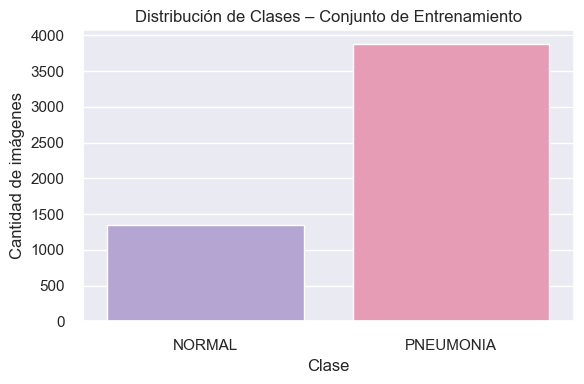

In [ ]:
classes = list(train_counts.keys())
counts  = list(train_counts.values())

plt.figure(figsize=(6, 4))

sns.barplot(
    x=classes,
    y=counts,
    hue=classes,            
    palette=["#B39DDB", "#F48FB1"],
    legend=False
)

plt.title("Distribución de Clases – Conjunto de Entrenamiento")
plt.xlabel("Clase")
plt.ylabel("Cantidad de imágenes")
plt.tight_layout()
plt.show()

Desbalanceo de clases importante en conjunto de entrenamiento, puede causar sesgo al detectar la imagen como PNEUMONIA. Se podría implementar el ajuste de peso de las muestras para que no se refleje el desbalanceo de clases. Debemos considerar para la evaluación el conjunto Test y cuidar las métricas de evaluación, pues hay riesgo de overfitting con el desbalanceo del conjunto Test.

In [ ]:
# Ejemplo de visualización de una imagen aleatoria por clase
def show_sample(directory: Path, label: str):
    path = directory / label

    images = [
        f for f in path.iterdir()
        if f.is_file() and f.suffix.lower() in ('.png', '.jpg', '.jpeg')
    ]

    img_path = random.choice(images)

    img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"No se pudo cargar la imagen: {img_path}")

    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap="gray")
    plt.title(label)
    plt.axis("off")
    plt.show()


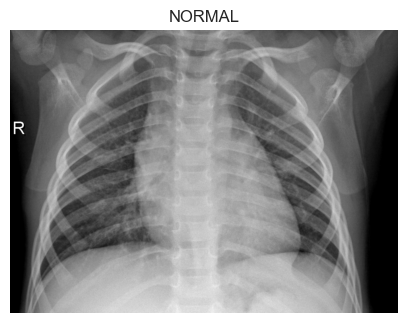

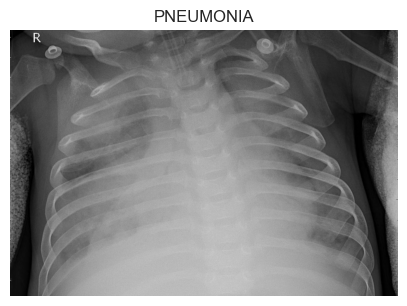

In [10]:
show_sample(train_dir, labels[0])
show_sample(train_dir, labels[1])


## PREPROCESADO DE IMÁGENES

In [13]:
IMG_SIZE = (224, 224) #tamaño para CNN DenseNet
BATCH_SIZE = 16

# #Data augmentation (para reducir overfitting por desbalanceo de clase)
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    zoom_range=0.15,
    horizontal_flip=True
)
#Normalización 
train_generator = train_datagen.flow_from_directory(
    directory=str(train_dir),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=True,
    seed=SEED
)

Found 5216 images belonging to 2 classes.


In [14]:
# Generador para validación y test (SIN augmentation)
val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

val_generator = val_datagen.flow_from_directory(
    directory=str(val_dir),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)

test_generator = val_datagen.flow_from_directory(
    directory=str(test_dir),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)
print(val_generator.class_indices)
print(test_generator.class_indices)



Found 16 images belonging to 2 classes.


Found 624 images belonging to 2 classes.
{'NORMAL': 0, 'PNEUMONIA': 1}
{'NORMAL': 0, 'PNEUMONIA': 1}


In [ ]:
y_train = train_generator.classes

# Cálculo de pesos 
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)


class_weights = dict(enumerate(class_weights))

print("Pesos de clase:", class_weights)

Pesos de clase: {0: 1.9448173005219984, 1: 0.6730322580645162}


## MODELO

In [ ]:
base_model = DenseNet121(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

# Congelar capas convolucionales
base_model.trainable = False

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [17]:
inputs = tf.keras.Input(shape=(224, 224, 3))

# Backbone congelado
x = base_model(inputs, training=False)

# Clasificador
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Dense(128, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)

outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [19]:
model.summary ()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densenet121 (Functional)        │ (None, 7, 7, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,172,929 (27.36 MB)

 Trainable params: 133,377 (521.00 KB)

 Non-trainable params: 7,039,552 (26.85 MB)

In [20]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name="accuracy"),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc")
    ]
)


In [21]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_auc",
    mode="max",                 
    patience=5,
    restore_best_weights=True,
    verbose=1
)


In [22]:
#Entrenamiento modelo con class_weights
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    class_weight=class_weights,
    callbacks=[early_stopping]
)



Epoch 1/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 599s 2s/step - accuracy: 0.8554 - auc: 0.9262 - loss: 0.3462 - precision: 0.9409 - recall: 0.8594 - val_accuracy: 0.9375 - val_auc: 0.9844 - val_loss: 0.2717 - val_precision: 1.0000 - val_recall: 0.8750
Epoch 2/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 686s 2s/step - accuracy: 0.9062 - auc: 0.9729 - loss: 0.2105 - precision: 0.9769 - recall: 0.8950 - val_accuracy: 0.9375 - val_auc: 0.9844 - val_loss: 0.1887 - val_precision: 1.0000 - val_recall: 0.8750
Epoch 3/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 849s 3s/step - accuracy: 0.9224 - auc: 0.9782 - loss: 0.1872 - precision: 0.9772 - recall: 0.9169 - val_accuracy: 0.9375 - val_auc: 0.9844 - val_loss: 0.1666 - val_precision: 1.0000 - val_recall: 0.8750
Epoch 4/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 894s 3s/step - accuracy: 0.9381 - auc: 0.9840 - loss: 0.1584 - precision: 0.9826 - recall: 0.9332 - val_accuracy: 0.9375 - val_auc: 0.9844 - val_loss: 0.1347 - val_precision: 1.0000 - val_recall: 0.8750
Epoch 5/20
326/326 ━━━━━━━━━

## MÉTRICAS DE EVALUACIÓN

In [34]:
test_results = model.evaluate(test_generator)

for name, value in zip(model.metrics_names, test_results):
    print(f"{name}: {value:.4f}")


39/39 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8990 - auc: 0.9637 - loss: 0.2503 - precision: 0.8978 - recall: 0.9462
loss: 0.2503
compile_metrics: 0.8990


In [35]:
from sklearn.metrics import confusion_matrix, classification_report

# Asegurar orden correcto
test_generator.reset()

# Predicciones
y_prob = model.predict(test_generator, verbose=0)
y_pred = (y_prob > 0.5).astype(int).ravel()

# Etiquetas reales
y_true = test_generator.classes

# Resultados
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(
    y_true,
    y_pred,
    target_names=["NORMAL", "PNEUMONIA"]
))


Confusion Matrix:
[[192  42]
 [ 21 369]]

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.90      0.82      0.86       234
   PNEUMONIA       0.90      0.95      0.92       390

    accuracy                           0.90       624
   macro avg       0.90      0.88      0.89       624
weighted avg       0.90      0.90      0.90       624



In [36]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_true, y_prob)
print(f"ROC AUC: {roc_auc:.4f}")


ROC AUC: 0.9648


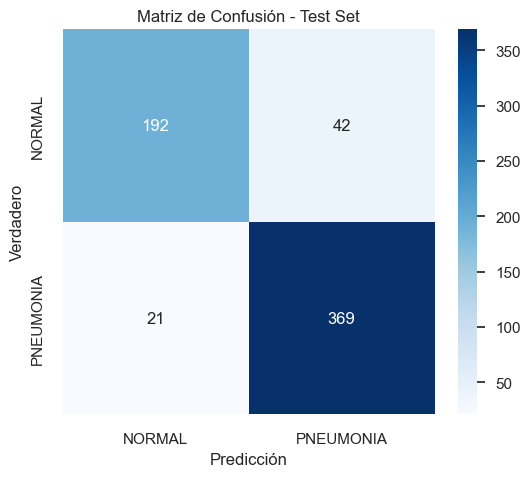

In [37]:
test_generator.reset()

# Predicciones
y_prob = model.predict(test_generator, verbose=0)
y_pred = (y_prob > 0.5).astype(int).ravel()
y_true = test_generator.classes

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)
labels_names = ["NORMAL", "PNEUMONIA"]

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,            # Mostrar los números
    fmt="d",               # Formato entero
    cmap="Blues",
    xticklabels=labels_names,
    yticklabels=labels_names
)
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.title("Matriz de Confusión - Test Set")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


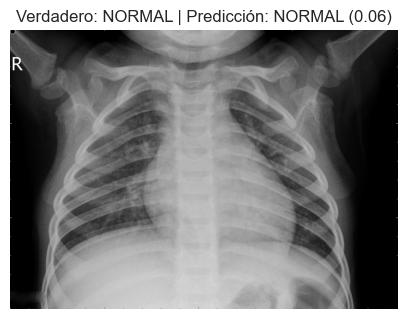

In [38]:
# Elegir aleatoriamente un label
label = random.choice(labels)  # ["NORMAL", "PNEUMONIA"]

# Directorio de validación para ese label
img_dir = val_dir / label

# Elegir aleatoriamente una imagen
img_path = random.choice([
    f for f in img_dir.iterdir() if f.is_file() and f.suffix.lower() in ('.png', '.jpg', '.jpeg')
])

# Leer imagen y convertir a RGB
img = cv2.imread(str(img_path))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Preprocesar para DenseNet
from tensorflow.keras.applications.densenet import preprocess_input
img_resized = cv2.resize(img_rgb, (224, 224))
img_array = np.expand_dims(img_resized, axis=0)
img_preprocessed = preprocess_input(img_array)

# Predicción
pred_prob = model.predict(img_preprocessed)[0][0]
pred_class = "PNEUMONIA" if pred_prob > 0.5 else "NORMAL"

# Mostrar resultado
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.imshow(img_rgb)
plt.axis("off")
plt.title(f"Verdadero: {label} | Predicción: {pred_class} ({pred_prob:.2f})")
plt.show()

## FINE  TUNING

In [30]:
# Descongelar últimas N capas de DenseNet
N = 50  # puedes ajustar según pruebas
for layer in base_model.layers[-N:]:
    if not isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = True

# Verificar capas entrenables
trainable_count = sum([layer.trainable for layer in base_model.layers])
print(f"Capas entrenables ahora: {trainable_count} / {len(base_model.layers)}")


Capas entrenables ahora: 36 / 427


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name="accuracy"),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc")
    ]
)


In [33]:
history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,  
    class_weight=class_weights,
    callbacks=[early_stopping]
)


Epoch 1/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 3345s 10s/step - accuracy: 0.9480 - auc: 0.9896 - loss: 0.1269 - precision: 0.9849 - recall: 0.9445 - val_accuracy: 1.0000 - val_auc: 1.0000 - val_loss: 0.0996 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 434s 1s/step - accuracy: 0.9572 - auc: 0.9926 - loss: 0.1091 - precision: 0.9882 - recall: 0.9538 - val_accuracy: 0.9375 - val_auc: 1.0000 - val_loss: 0.1053 - val_precision: 1.0000 - val_recall: 0.8750
Epoch 3/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 680s 2s/step - accuracy: 0.9565 - auc: 0.9916 - loss: 0.1109 - precision: 0.9906 - recall: 0.9505 - val_accuracy: 0.9375 - val_auc: 1.0000 - val_loss: 0.1028 - val_precision: 1.0000 - val_recall: 0.8750
Epoch 4/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 2046s 6s/step - accuracy: 0.9572 - auc: 0.9929 - loss: 0.1073 - precision: 0.9893 - recall: 0.9528 - val_accuracy: 0.9375 - val_auc: 1.0000 - val_loss: 0.0970 - val_precision: 1.0000 - val_recall: 0.8750
Epoch 5/10
326/326 ━━━━━━

In [54]:
test_results_finetune = model.evaluate(test_generator)

for name, value in zip(model.metrics_names, test_results_finetune):
    print(f"{name}: {value:.4f}")


39/39 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8990 - auc: 0.9637 - loss: 0.2503 - precision: 0.8978 - recall: 0.9462
loss: 0.2503
compile_metrics: 0.8990


In [55]:
y_true = test_generator.classes
y_pred_finetune = (model.predict(test_generator) > 0.5).astype(int).ravel()

print(confusion_matrix(y_true, y_pred_finetune))
print(classification_report(y_true, y_pred_finetune, target_names=["NORMAL","PNEUMONIA"]))


39/39 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step
[[192  42]
 [ 21 369]]
              precision    recall  f1-score   support

      NORMAL       0.90      0.82      0.86       234
   PNEUMONIA       0.90      0.95      0.92       390

    accuracy                           0.90       624
   macro avg       0.90      0.88      0.89       624
weighted avg       0.90      0.90      0.90       624



## ENSAMBLE

In [42]:
base_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [43]:
for layer in base_model.layers:
    layer.trainable = False


In [44]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
output = Dense(1, activation="sigmoid")(x)

mobilenet_model = Model(inputs=base_model.input, outputs=output)


In [45]:
mobilenet_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy", "Precision", "Recall", "AUC"]
)


In [46]:
history_mobilenet = mobilenet_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    class_weight=class_weights
)


Epoch 1/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 201s 604ms/step - AUC: 0.9829 - Precision: 0.9792 - Recall: 0.9254 - accuracy: 0.9300 - loss: 0.1664 - val_AUC: 1.0000 - val_Precision: 1.0000 - val_Recall: 0.7500 - val_accuracy: 0.8750 - val_loss: 0.1971
Epoch 2/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 273s 838ms/step - AUC: 0.9888 - Precision: 0.9833 - Recall: 0.9437 - accuracy: 0.9463 - loss: 0.1307 - val_AUC: 1.0000 - val_Precision: 1.0000 - val_Recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 0.1175
Epoch 3/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 423s 1s/step - AUC: 0.9910 - Precision: 0.9858 - Recall: 0.9512 - accuracy: 0.9536 - loss: 0.1160 - val_AUC: 1.0000 - val_Precision: 1.0000 - val_Recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 0.0762
Epoch 4/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 401s 1s/step - AUC: 0.9934 - Precision: 0.9883 - Recall: 0.9577 - accuracy: 0.9601 - loss: 0.0993 - val_AUC: 1.0000 - val_Precision: 1.0000 - val_Recall: 0.8750 - val_accuracy: 0.9375 - val_loss: 0.0826
Epoch 5/10
326/326 ━━━

In [47]:
pred_model1 = model.predict(test_generator)
pred_mobilenet = mobilenet_model.predict(test_generator)


39/39 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 21s 497ms/step


In [48]:
ensemble_pred = (pred_model1 + pred_mobilenet) / 2
ensemble_classes = (ensemble_pred > 0.5).astype(int)

In [52]:
print("Accuracy ensamble:", accuracy_score(y_true, ensemble_classes))
print(classification_report(y_true, ensemble_classes))

Accuracy ensamble: 0.905448717948718
              precision    recall  f1-score   support

           0       0.92      0.82      0.87       234
           1       0.90      0.96      0.93       390

    accuracy                           0.91       624
   macro avg       0.91      0.89      0.90       624
weighted avg       0.91      0.91      0.90       624



In [56]:
y_true = test_generator.classes

pred_mobilenet = mobilenet_model.predict(test_generator)
y_pred_mobilenet = (pred_mobilenet > 0.5).astype(int).ravel()



39/39 ━━━━━━━━━━━━━━━━━━━━ 20s 511ms/step


In [57]:
print(confusion_matrix(y_true, y_pred_mobilenet))
print(classification_report(y_true, y_pred_mobilenet, target_names=["NORMAL","PNEUMONIA"]))


[[187  47]
 [ 15 375]]
              precision    recall  f1-score   support

      NORMAL       0.93      0.80      0.86       234
   PNEUMONIA       0.89      0.96      0.92       390

    accuracy                           0.90       624
   macro avg       0.91      0.88      0.89       624
weighted avg       0.90      0.90      0.90       624



## MÉTRICAS COMPARATIVAS

In [60]:
dense_results = model.evaluate(test_generator, return_dict=True)
print(dense_results)

dense_acc = dense_results["accuracy"]


39/39 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.8990 - auc: 0.9637 - loss: 0.2503 - precision: 0.8978 - recall: 0.9462
{'accuracy': 0.8990384340286255, 'auc': 0.9637025594711304, 'loss': 0.2503053843975067, 'precision': 0.8978102207183838, 'recall': 0.9461538195610046}


In [61]:
mobile_results = mobilenet_model.evaluate(test_generator, return_dict=True)
print(mobile_results)

mobile_acc = mobile_results.get("accuracy") 


39/39 ━━━━━━━━━━━━━━━━━━━━ 19s 473ms/step - AUC: 0.9563 - Precision: 0.8886 - Recall: 0.9615 - accuracy: 0.9006 - loss: 0.2891
{'AUC': 0.9562568068504333, 'Precision': 0.8886256217956543, 'Recall': 0.9615384340286255, 'accuracy': 0.9006410241127014, 'loss': 0.2891062796115875}


In [62]:
ensemble_acc = accuracy_score(y_true, ensemble_classes)


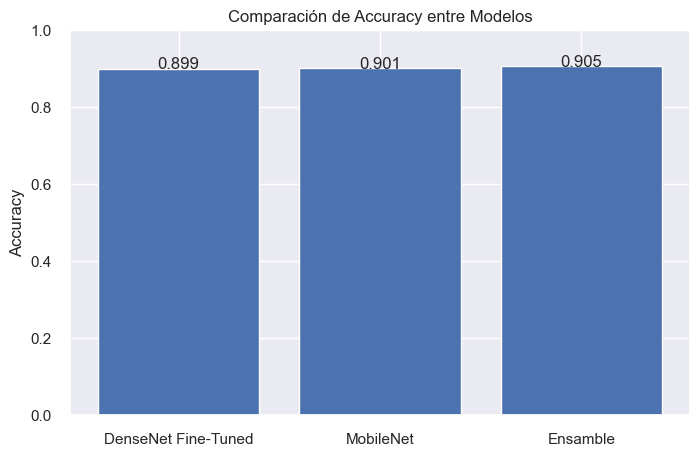

In [63]:
model_names = ["DenseNet Fine-Tuned", "MobileNet", "Ensamble"]
accuracies = [dense_acc, mobile_acc, ensemble_acc]

plt.figure(figsize=(8,5))
bars = plt.bar(model_names, accuracies)

plt.title("Comparación de Accuracy entre Modelos")
plt.ylabel("Accuracy")
plt.ylim(0,1)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{height:.3f}",
        ha="center"
    )

plt.show()


## GUARDAR MODELOS

In [64]:
model.save("densenet_model.keras")
mobilenet_model.save("mobilenet_model.keras")

In [66]:
import json

class_indices = train_generator.class_indices

with open("class_indices.json", "w") as f:
    json.dump(class_indices, f)
